In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Cross-Validation
=====================================

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Validation with a training / test split

![train test split](train_test_split.svg)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

### Cross-validation for more robust estimates

![cross-validation](cross_validation.svg)

In [10]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(classifier, X, y) # default is 3
print(scores)
print(np.mean(scores))

[ 0.98039216  0.98039216  1.        ]
0.986928104575


In [11]:
scores = cross_val_score(classifier, X, y, cv=5) # setting to 5

print(scores)
print(np.mean(scores))

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


### Custom cross-validation iterators

In [12]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

In [13]:
cv = StratifiedKFold(iris.target, n_folds=5)
for train, test in cv:
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


In [14]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)

Each column represents a sample in the dataset  
Each row represents a iteration of validation

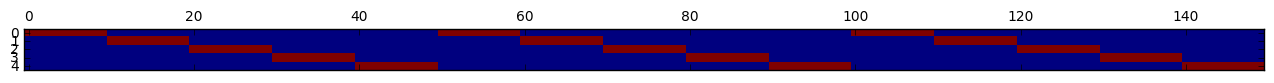

In [16]:
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)

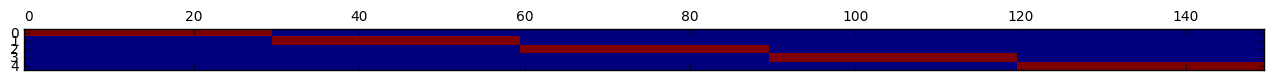

In [17]:
cv = KFold(n_samples, n_folds=5)
plot_cv(cv, n_samples)

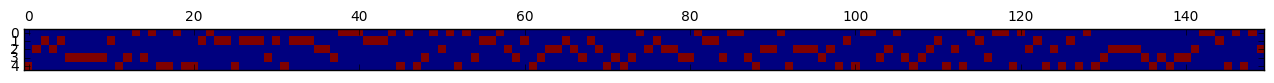

In [18]:
cv = KFold(n_samples, n_folds=5, shuffle=True)
plot_cv(cv, n_samples)

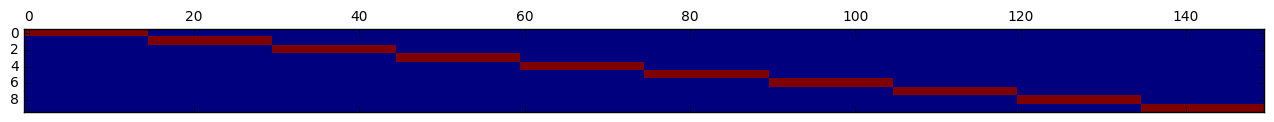

In [19]:
cv = KFold(n_samples, n_folds=10)
plot_cv(cv, n_samples)

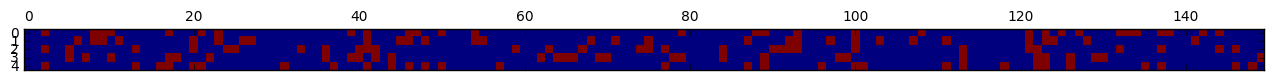

In [20]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
plot_cv(cv, n_samples)

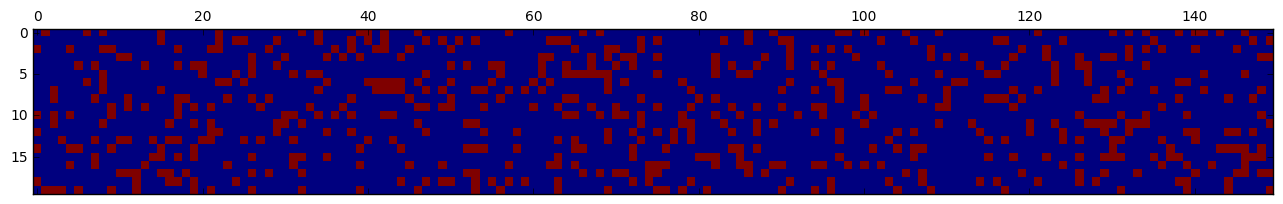

In [21]:
cv = ShuffleSplit(n_samples, n_iter=20, test_size=.2)
plot_cv(cv, n_samples)

Pass ```cv``` to cross_val_score to get an aggregate score of iterations

In [34]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
scores = cross_val_score(classifier, X, y, cv=cv)

print(scores)
print(np.mean(scores))

[ 1.          0.93333333  1.          0.96666667  0.96666667]
0.973333333333


In [35]:
cv = KFold(n_samples, n_folds=10)
scores = cross_val_score(classifier, X, y, cv=cv)

print(scores)
print(np.mean(scores))

[ 1.          1.          1.          1.          0.8         0.86666667
  1.          0.86666667  0.8         1.        ]
0.933333333333
